In [2]:
# Data management
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


## Para los modelos
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#KNN neighbors
from sklearn.neighbors import KNeighborsClassifier

## Metricas
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve

# For warnings
import warnings
warnings.filterwarnings("ignore")

## Data preprocessing

In [3]:
header_names=['Entity','Code','Year','Liver Cancer','Kidney Cancer','Lip and oral cavity cancer','Tracheal, bronchus, and lung cancer',
             'Larynx Cancer','Gallbladder and biliary tract cancer','Malignant Skin Cancer','Leukemia','Hodgkin Lymphoma','Multiple Myeloma',
             'Other Neoplasms','Breast Cancer','Prostrate Cancer','Thyroid Cancer','Stomach Cancer','Bladder Cancer','Uterine Cancer','Ovarian Cancer',
             'Cervical Cancer','Brain and central nervous system cancer','Non-Hodgkin Lymphoma','Pancreatic Cancer','Esophageal Cancer','Testicular Cancer',
             'Nasopharynx Cancer','Other Pharynx Cancer',' Colon and rectum cancer','Non-melanoma skin cancer','Mesothelioma']
# load dataset
data = pd.read_csv('total-cancer-deaths-by-type.csv', header=None, names=header_names,skiprows=1,)
data

,Entity,Code,Year,Liver Cancer,Kidney Cancer,Lip and oral cavity cancer,"Tracheal, bronchus, and lung cancer",Larynx Cancer,Gallbladder and biliary tract cancer,Malignant Skin Cancer,...,Brain and central nervous system cancer,Non-Hodgkin Lymphoma,Pancreatic Cancer,Esophageal Cancer,Testicular Cancer,Nasopharynx Cancer,Other Pharynx Cancer,Colon and rectum cancer,Non-melanoma skin cancer,Mesothelioma
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Zimbabwe,ZWE,2015,948,59,145,902,149,87,125,...,104,96,426,988,11,53,40,719,39,16
8006,Zimbabwe,ZWE,2016,966,61,150,932,153,89,129,...,109,100,449,1012,11,54,42,744,40,17
8007,Zimbabwe,ZWE,2017,982,63,154,960,156,91,133,...,112,102,471,1035,12,56,43,767,41,17
8008,Zimbabwe,ZWE,2018,998,66,159,993,160,92,137,...,115,105,495,1059,12,57,44,792,43,17


The goal is to predict based on the year the deathtoll of cancer by type.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Entity                                   8010 non-null   object
 1   Code                                     6150 non-null   object
 2   Year                                     8010 non-null   int64 
 3   Liver Cancer                             8010 non-null   int64 
 4   Kidney Cancer                            8010 non-null   int64 
 5   Lip and oral cavity cancer               8010 non-null   int64 
 6   Tracheal, bronchus, and lung cancer      8010 non-null   int64 
 7   Larynx Cancer                            8010 non-null   int64 
 8   Gallbladder and biliary tract cancer     8010 non-null   int64 
 9   Malignant Skin Cancer                    8010 non-null   int64 
 10  Leukemia                                 8010 non-null   int

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8010.0,2004.500000,8.655982,1990.0,1997.00,2004.5,2012.00,2019.0
Liver Cancer,8010.0,15941.000624,55089.953210,0.0,60.00,341.5,3105.75,484577.0
Kidney Cancer,8010.0,4610.941199,13808.207577,0.0,21.00,147.0,1465.25,166438.0
Lip and oral cavity cancer,8010.0,5346.948814,16321.642622,0.0,29.00,131.0,1365.25,199398.0
"Tracheal, bronchus, and lung cancer",8010.0,58910.046816,180750.862406,0.0,222.25,1428.5,14257.75,2042640.0
Larynx Cancer,8010.0,3844.437079,10907.603041,0.0,26.00,136.5,1238.50,123356.0
Gallbladder and biliary tract cancer,8010.0,4986.568414,14733.778028,0.0,20.00,127.0,1482.00,172441.0
Malignant Skin Cancer,8010.0,1947.733708,5868.243072,0.0,8.00,69.0,654.50,62844.0
Leukemia,8010.0,11190.691261,30798.338572,0.0,92.00,494.5,3879.00,334592.0
Hodgkin Lymphoma,8010.0,1010.150312,2704.259457,0.0,7.00,46.0,314.00,27839.0


In [6]:
data.isnull().sum()

Entity                                        0
Code                                       1860
Year                                          0
Liver Cancer                                  0
Kidney Cancer                                 0
Lip and oral cavity cancer                    0
Tracheal, bronchus, and lung cancer           0
Larynx Cancer                                 0
Gallbladder and biliary tract cancer          0
Malignant Skin Cancer                         0
Leukemia                                      0
Hodgkin Lymphoma                              0
Multiple Myeloma                              0
Other Neoplasms                               0
Breast Cancer                                 0
Prostrate Cancer                              0
Thyroid Cancer                                0
Stomach Cancer                                0
Bladder Cancer                                0
Uterine Cancer                                0
Ovarian Cancer                          

In [7]:

''' data = data.drop(['Entity','Code'], axis=1) '''

" data = data.drop(['Entity','Code'], axis=1) "

In [8]:
data.isnull().sum()

Entity                                        0
Code                                       1860
Year                                          0
Liver Cancer                                  0
Kidney Cancer                                 0
Lip and oral cavity cancer                    0
Tracheal, bronchus, and lung cancer           0
Larynx Cancer                                 0
Gallbladder and biliary tract cancer          0
Malignant Skin Cancer                         0
Leukemia                                      0
Hodgkin Lymphoma                              0
Multiple Myeloma                              0
Other Neoplasms                               0
Breast Cancer                                 0
Prostrate Cancer                              0
Thyroid Cancer                                0
Stomach Cancer                                0
Bladder Cancer                                0
Uterine Cancer                                0
Ovarian Cancer                          

## Plotting

Which **continent** has the highest death toll?

In [9]:
Africa=data[data['Entity']=='Africa']#DataFrame of values in Africa
Asia=data[data['Entity']=='Asia']#DataFrame of values in Asia
Europe=data[data['Entity']=='Europe']#DataFrame of values in Europe
Oceania=data[data['Entity']=='Oceania']#DataFrame of values in Oceania
NorthAmerica=data[data['Entity']=='North America']#DataFrame of values in North America
Continents=pd.concat([Africa,Asia,Europe,Oceania,NorthAmerica],ignore_index=True)#This joins 2 or more DataFrames together

In [10]:
Continents=pd.DataFrame({'Entity':['Africa','Asia','Europe','North America','Oceania','South America'],
                              'Total Number of Deaths':[12656434,115131354,56755262,20464717,158580,11321393]})
Continents

,Entity,Total Number of Deaths
0,Africa,12656434
1,Asia,115131354
2,Europe,56755262
3,North America,20464717
4,Oceania,158580
5,South America,11321393


([<matplotlib.patches.Wedge at 0x7ff578aa4a00>,
 [Text(1.6222483590507004, -0.30134741007234545, 'Africa'),
  Text(-0.7432584298362425, -1.4731146956287429, 'Asia'),
  Text(-0.29532620815727983, 1.6233553002271077, 'Europe'),
  Text(1.333087069522803, 0.972305952399298, 'North America'),
  Text(1.5604961056407223, 0.5360521469783884, 'Oceania'),
  Text(1.6277818496439047, 0.26986339131099, 'South America')],
 [Text(0.8848627413003819, -0.16437131458491566, '5.8%'),
  Text(-0.4054136890015867, -0.8035171067065869, '53.2%'),
  Text(-0.16108702263124353, 0.8854665273966041, '26.2%'),
  Text(0.7271384015578924, 0.5303487013087078, '9.5%'),
  Text(0.8511796939858484, 0.29239208017003, '0.1%'),
  Text(0.8878810088966752, 0.14719821344235817, '5.2%')])

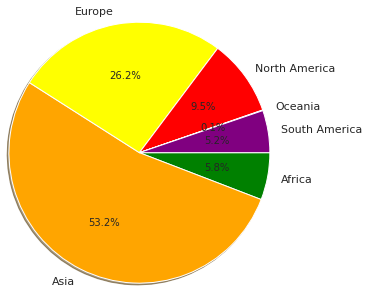

In [11]:
plt.pie(Continents['Total Number of Deaths'],labels=Continents['Entity'],autopct='%1.1f%%',
        colors=['green','orange','yellow','red','blue','purple'],radius=1.5,counterclock=False,shadow=True,)

In [12]:
data['Total Number of Deaths']=data.iloc[:,3:32].sum(axis=1)
WRLD=data[data['Entity']=='World']#DataFrame of all te rows and columns about 'World' Entity
WRLD_Death=WRLD['Total Number of Deaths']#DataFrame of all te rows and columns about 'Total Number of Deaths' Entity
WRLD_Year=WRLD['Year']
WRLD_Data=pd.concat([WRLD_Year,WRLD_Death],axis=1)#This joins two DataFrames together, column by column(axis=1)
WRLD_Data.reset_index(inplace=True)#This resets the index of the concated DataFrames
#WRLD_Data

Text(0, 0.5, 'Death Rate')

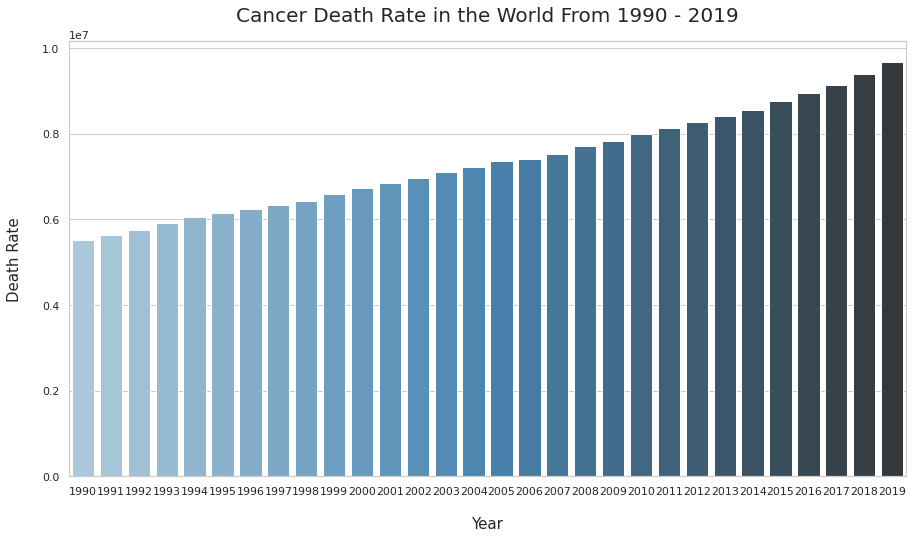

In [13]:
plt.figure(figsize=(15,8))#This is the size you want your plot to have

sns.barplot(WRLD_Year,WRLD_Death,palette='Blues_d')
plt.title('Cancer Death Rate in the World From 1990 - 2019',pad=float(20),fontdict={'fontsize':float(20),'fontweight':int(2)})
plt.xlabel('Year',labelpad=float(20),fontdict={'fontsize':float(15),'fontweight':int(2)})
plt.ylabel('Death Rate',labelpad=float(20),fontdict={'fontsize':float(15),'fontweight':int(2)})

## Data partition

In [14]:
## Dumizando los datos
cat_vars = ['Entity','Code','Liver Cancer','Kidney Cancer','Lip and oral cavity cancer','Tracheal, bronchus, and lung cancer',
             'Larynx Cancer','Gallbladder and biliary tract cancer','Malignant Skin Cancer','Leukemia','Hodgkin Lymphoma','Multiple Myeloma',
             'Other Neoplasms','Breast Cancer','Prostrate Cancer','Thyroid Cancer','Stomach Cancer','Bladder Cancer','Uterine Cancer','Ovarian Cancer',
             'Cervical Cancer','Brain and central nervous system cancer','Non-Hodgkin Lymphoma','Pancreatic Cancer','Esophageal Cancer','Testicular Cancer',
             'Nasopharynx Cancer','Other Pharynx Cancer',' Colon and rectum cancer','Non-melanoma skin cancer','Mesothelioma']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
    
cat_vars = ['Entity','Code','Liver Cancer','Kidney Cancer','Lip and oral cavity cancer','Tracheal, bronchus, and lung cancer',
             'Larynx Cancer','Gallbladder and biliary tract cancer','Malignant Skin Cancer','Leukemia','Hodgkin Lymphoma','Multiple Myeloma',
             'Other Neoplasms','Breast Cancer','Prostrate Cancer','Thyroid Cancer','Stomach Cancer','Bladder Cancer','Uterine Cancer','Ovarian Cancer',
             'Cervical Cancer','Brain and central nervous system cancer','Non-Hodgkin Lymphoma','Pancreatic Cancer','Esophageal Cancer','Testicular Cancer',
             'Nasopharynx Cancer','Other Pharynx Cancer',' Colon and rectum cancer','Non-melanoma skin cancer','Mesothelioma']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [15]:
data_final = data[to_keep]
data_final.columns.values

array(['Year', 'Total Number of Deaths', 'Entity_Afghanistan', ...,
       'Mesothelioma_28356', 'Mesothelioma_28778', 'Mesothelioma_29251'],
      dtype=object)

In [16]:
## Separación de Features (X1, X2,...,Xk) y Label (y)
X = data_final.loc[:, data_final.columns != 'Year']
y = data_final.loc[:, data_final.columns == 'Year']

In [17]:
## Particionamiento de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.03
